In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
 df['Churn']=df['Churn'].map({'Yes':1,'No':0})

assigning numerical values to the response vector 

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [7]:
df.drop('customerID',axis=1,inplace=True)

customerID is of type string and not of particular interest in predicting the churners

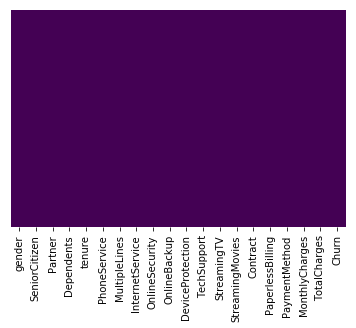

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

to check if there is any NaN value in the data provided 

In [9]:
sns.set_style('whitegrid')

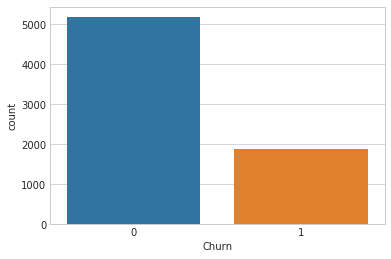

In [10]:
sns.countplot(x='Churn',data=df)

there are more number of non churners than there are churners

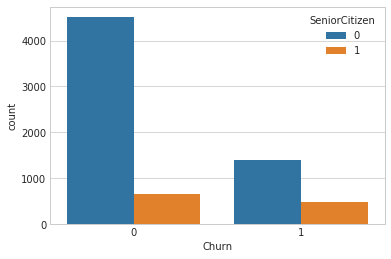

In [11]:
sns.countplot(x='Churn',hue='SeniorCitizen',data=df)

to check if senior citizen affects the probability of a person becoming a churner or not. 


In [12]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

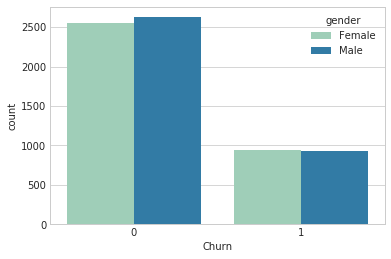

In [13]:
sns.countplot(x='Churn',hue='gender',data=df,palette='YlGnBu')

In [14]:
df.drop('gender',axis=1,inplace=True)

gender did not seem to affect rate of churning a lot so we drop it

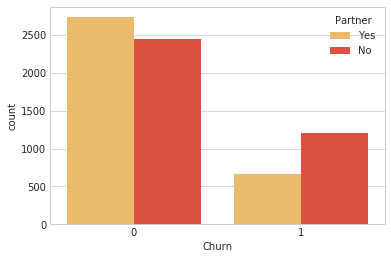

In [15]:
sns.countplot(x='Churn',hue='Partner',data=df,palette='YlOrRd')

In [16]:
df.drop('Partner',axis=1,inplace=True)

partner does not seem to affect rate of churning a lot so we drop it

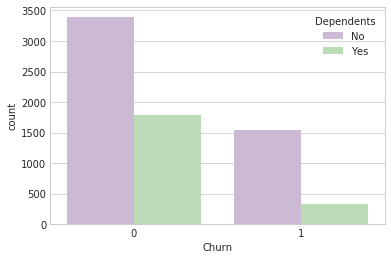

In [17]:
sns.countplot(x='Churn',hue='Dependents',data=df,palette='PRGn')

In [18]:
 df['Dependents']=df['Dependents'].map({'Yes':1,'No':0})

dependents affect churners and so we assign numerical values to it

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
SeniorCitizen       7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(4), object(13)
memory usage: 990.5+ KB


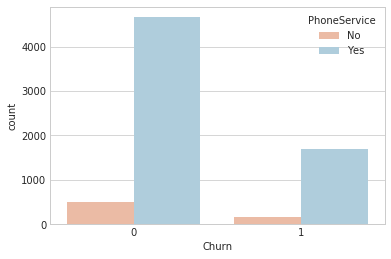

In [20]:
sns.countplot(x='Churn',hue='PhoneService',data=df,palette='RdBu')

In [21]:
 df['PhoneService']=df['PhoneService'].map({'Yes':1,'No':0})

Phone service affect churners and so we assign numerical values to it

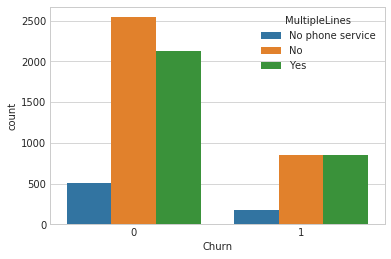

In [22]:
sns.countplot(x='Churn',hue='MultipleLines',data=df)

In [23]:
 df['MultipleLines']=df['MultipleLines'].map({'Yes':1,'No':0,'No phone service':2})

a lot of difference between no phone service and Yes and no to multiple lines in non churners and also 
some difference amongst churners. so we assign numerical values to it

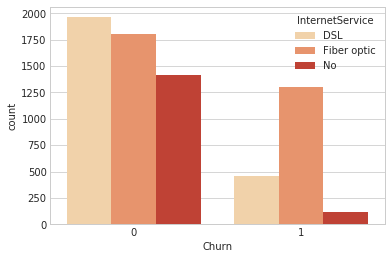

In [24]:
sns.countplot(x='Churn',hue='InternetService',data=df,palette='OrRd')

In [ ]:
 df['InternetService']=df['InternetService'].map({'DSL':1,'Fiber optic':0,'No':2})

Internet service affects churners and so we assign numerical values to it

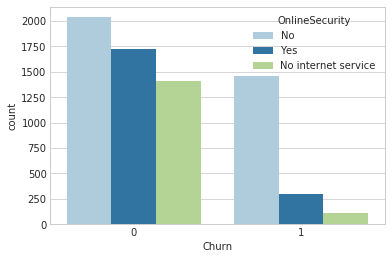

In [26]:
sns.countplot(x='Churn',hue='OnlineSecurity',data=df,palette='Paired')

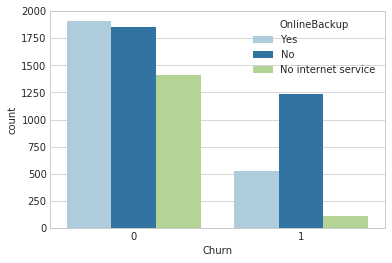

In [27]:
sns.countplot(x='Churn',hue='OnlineBackup',data=df,palette='Paired')

Online security and online backup affect the churners mainly and so we use it and assign numerical values to it

In [28]:
df['OnlineBackup']=df['OnlineBackup'].map({'Yes':1,'No':0,'No internet service':2})

In [29]:
df['OnlineSecurity']=df['OnlineSecurity'].map({'Yes':1,'No':0,'No internet service':2})

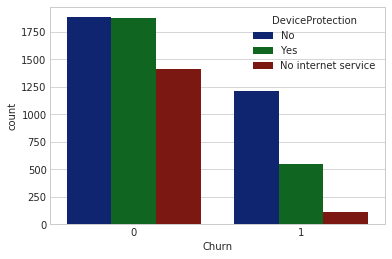

In [30]:
sns.countplot(x='Churn',hue='DeviceProtection',data=df,palette='dark')

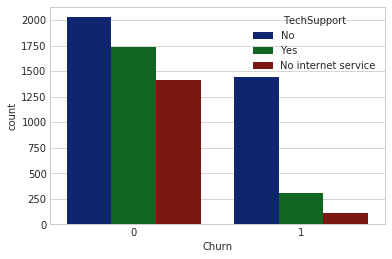

In [31]:
sns.countplot(x='Churn',hue='TechSupport',data=df,palette='dark')

In [32]:
df.drop('DeviceProtection',axis=1,inplace=True)

In [33]:
df['TechSupport']=df['TechSupport'].map({'Yes':1,'No':0,'No internet service':2})

device protection and tech support have quite similar countplots and so we drop device protection and use tech support

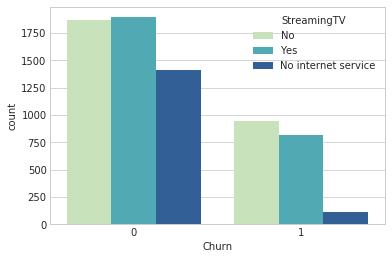

In [34]:
sns.countplot(x='Churn',hue='StreamingTV',data=df,palette='YlGnBu')

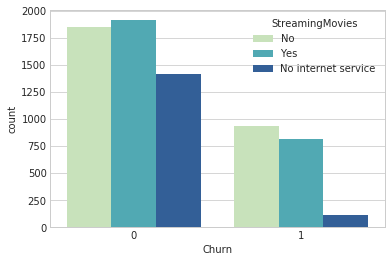

In [35]:
sns.countplot(x='Churn',hue='StreamingMovies',data=df,palette='YlGnBu')

In [36]:
df.drop("StreamingTV",axis=1,inplace=True)

In [37]:
df['StreamingMovies']=df['StreamingMovies'].map({'Yes':1,'No':0,'No internet service':2})

streaming movies and streaming tv have similar countplots so we drop streaming tv and use streaming movie

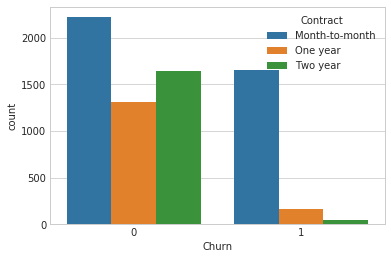

In [38]:
sns.countplot(x='Churn',hue='Contract',data=df)

In [39]:
df['Contract']=df['Contract'].map({'One year':1,'Month-to-month':0,'Two year':2})

contract affects the churners so we assign numerical values to it

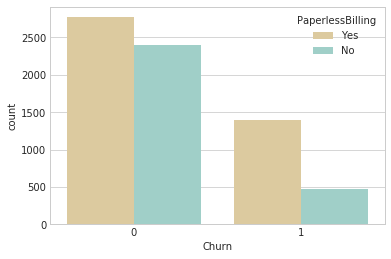

In [40]:
sns.countplot(x='Churn',hue='PaperlessBilling',data=df,palette='BrBG')

In [41]:
 df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1,'No':0})

Paperless Billing affects the churners so we assign numerical values to it

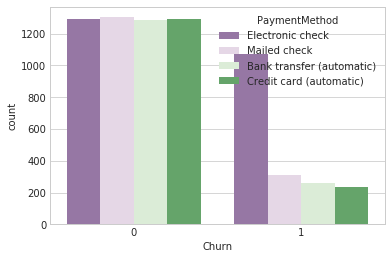

In [42]:
sns.countplot(x='Churn',hue='PaymentMethod',data=df,palette='PRGn')

In [43]:
df['PaymentMethod']=df['PaymentMethod'].map({'Mailed check':1,'Electronic check':0,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

payment method affects churners so we assign numerical values to it

In [44]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


converting total charges to float type 

In [45]:
round1 = round((df['TotalCharges']))

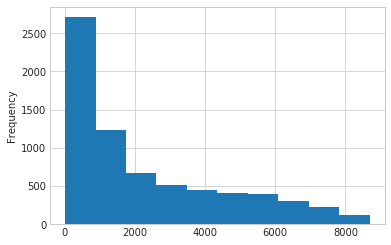

In [48]:
df['TotalCharges'].plot.hist()

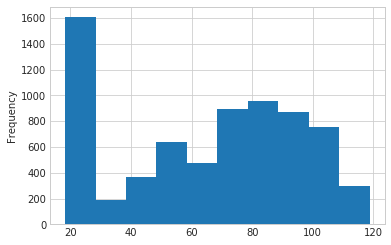

In [49]:
df['MonthlyCharges'].plot.hist()

In [50]:
df['TotalCharges'].mean()

2283.3004408418697

In [51]:
df['MonthlyCharges'].mean()

64.76169246059922

In [52]:
df.fillna(df['TotalCharges'].mean(),inplace=True)

filling the empty values in total charges with the mean

In [53]:

df.columns

Index(['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'TechSupport', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [54]:
X = df.drop('Churn',axis=1)

y = df['Churn']

# train and test entire data set

here we use the entire data to train and test the accuracy

# logistic regression


In [55]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X,y)

logreg.predict(X)

array([1, 0, 0, ..., 0, 1, 0])

In [56]:
y_pred = logreg.predict(X)

print(len(y_pred))

7043


In [57]:
from sklearn import metrics
print(metrics.accuracy_score(y,y_pred))

0.8067584836007383


# knn

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
y_pred1 = knn.predict(X)
print(metrics.accuracy_score(y,y_pred1))

0.831463864830328


In [95]:
k_range = list(range(1,30))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    y_pred1 = knn.predict(X)
    scores.append(metrics.accuracy_score(y,y_pred1))

Text(0,0.5,'Testing Accuracy')

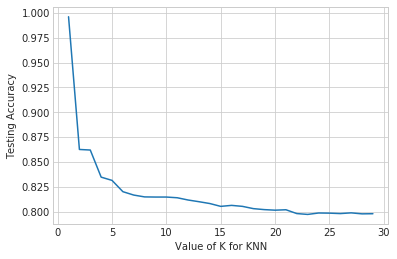

In [96]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [99]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,y)
y_pred1 = knn.predict(X)
print(metrics.accuracy_score(y,y_pred1))

0.8625585687917081


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X,y)
y_pred2 = knn1.predict(X)
print(metrics.accuracy_score(y,y_pred2))

0.9960244214113304


k = 1 in knn has 99.6% accuracy but this may not be the best model to use as it is prone to overfitting

# train_test_split

here we divide the data in 2 parts. 1 part is used to train the data and the other is used to test the data.

In [60]:
print(X.shape)
print(y.shape)

(7043, 15)
(7043,)


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
print(X_train.shape)
print(X_test.shape)

(4718, 15)
(2325, 15)


In [77]:
print(y_train.shape)
print(y_test.shape)

(4718,)
(2325,)


# logistic regression

In [65]:
logreg1 = LogisticRegression()

logreg1.fit(X_train,y_train)

y_pred3 = logreg1.predict(X_test)

print(metrics.accuracy_score(y_test,y_pred3))

0.8159139784946237


# knn

In [66]:
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train,y_train)
y_pred4 = knn2.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred4))

0.7733333333333333


In [67]:
knn3 = KNeighborsClassifier(n_neighbors=1)
knn3.fit(X_train,y_train)
y_pred5 = knn3.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred5))

0.7264516129032258


In [70]:
k_range = list(range(1,30))
scores = []
for k in k_range:
    knn6 = KNeighborsClassifier(n_neighbors=k)
    knn6.fit(X_train,y_train)
    y_pred6 = knn6.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred6))

we run a loop to find the most suitable value of k and then plot the values of k . here k =23 gives a 79.2% accuracy which is the best.

Text(0,0.5,'Testing Accuracy')

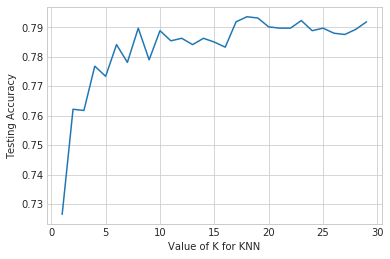

In [71]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Text(0,0.5,'Testing Accuracy')

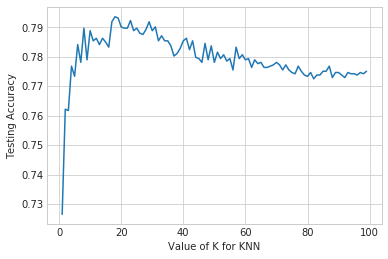

In [72]:
k_range = list(range(1,100))
scores = []
for k in k_range:
    knn6 = KNeighborsClassifier(n_neighbors=k)
    knn6.fit(X_train,y_train)
    y_pred6 = knn6.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred6))
    
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [73]:
knn7 = KNeighborsClassifier(n_neighbors=23)
knn7.fit(X_train,y_train)
y_pred7 = knn7.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred7))

0.792258064516129


# K Fold

in this method we run the train_test_split method k number of times. in every iteration the training and testing data is changed and in the end we take the mean

# knn

In [78]:
from sklearn.model_selection import cross_val_score

In [80]:
knn8 = KNeighborsClassifier(n_neighbors=5)
scores1 = cross_val_score(knn8,X,y,cv=10,scoring='accuracy')
print(scores1)

[0.74184397 0.78014184 0.77304965 0.76170213 0.75710227 0.74147727
 0.75994318 0.75568182 0.75142045 0.77098151]


In [82]:
print(scores1.mean())

0.7593344096476097


In [84]:
k_range1 = range(1,31)
k_scores2 = []
for k in k_range1:
    knn9 = KNeighborsClassifier(n_neighbors=k)
    scores2 = cross_val_score(knn9,X,y,cv=10,scoring='accuracy')
    k_scores2.append(scores2.mean())
print(k_scores2)

[0.7201425438596489, 0.7601897132167289, 0.7542209770597229, 0.7687047795530438, 0.7593344096476097, 0.7767997614648651, 0.7735325105149433, 0.7841831040039327, 0.7804919352952667, 0.7858890621317133, 0.7837616069062039, 0.7841877432698402, 0.7813454197860693, 0.7813450145274052, 0.7796410763876469, 0.7810613300233962, 0.7840404569666888, 0.7827634559633438, 0.784892327301342, 0.7814870617015773, 0.7836163348589861, 0.7826230235185302, 0.7844684049569268, 0.7826214093623808, 0.783189390844066, 0.782763455963344, 0.782763860648799, 0.781485248355349, 0.7840412611787193, 0.7823377237119538]


Text(0,0.5,'accuracy')

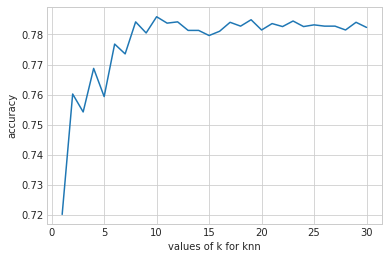

In [85]:
plt.plot(k_range1,k_scores2)
plt.xlabel('values of k for knn')
plt.ylabel('accuracy')

# logistic regression

In [89]:
knn0 = KNeighborsClassifier(n_neighbors=10)
print((cross_val_score(knn0,X,y,cv=10,scoring='accuracy')).mean())

0.7858890621317133


In [93]:
logreg2 = LogisticRegression()
print(cross_val_score(logreg2,X,y,cv=20,scoring='accuracy').mean())

0.8066148370371105


Conclusion

we can conclude that logistic regression is the best model here. using train_test_split we get an accuracy of 81.59% . 
we can also use knn when knn=2 when we train the whole data and also test the whole data. it gives us an accuracy of 86.2%. but this model maybe prone to over-fitting and may not give proper output for out of sample data.